<a href="https://colab.research.google.com/github/Miksan31/Agentic-AI/blob/main/Langgraph_ML_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langchain langchain_community langchainhub langchain_groq --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.0/413.0 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00


In [2]:
from langgraph.graph import Graph

In [3]:
from langchain_groq import ChatGroq

In [4]:
groq_api_key = "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"
llm_name = "llama3-70b-8192"
llm = ChatGroq(temperature=0, groq_api_key=groq_api_key, model_name=llm_name)

In [5]:
llm.invoke("Hi! tell me about apple").content

"Apple!\n\nApple Inc. is a multinational technology company headquartered in Cupertino, California, that designs, manufactures, and markets consumer electronics, computer software, and online services. Here are some interesting facts about Apple:\n\n**History**: Apple was founded on April 1, 1976, by Steve Jobs, Steve Wozniak, and Ronald Wayne. The company was originally headquartered in the garage of Jobs' parents' home.\n\n**Products**: Apple is known for its innovative and sleek products, including:\n\n1. **iPhones**: Apple's flagship product, which revolutionized the smartphone industry.\n2. **Mac Computers**: MacBook laptops and iMac desktops, known for their ease of use and sleek design.\n3. **iPads**: Tablets that combine the functionality of a laptop with the portability of a smartphone.\n4. **Apple Watch**: A smartwatch that tracks fitness and health metrics, receives notifications, and controls music playback.\n5. **AirPods**: Wireless earbuds that provide high-quality audio 

In [6]:
def function1(input):
  response=llm.invoke("Hi, how are you?").content
  return response

In [7]:
function1("Hi")

'I\'m just a language model, I don\'t have emotions or feelings like humans do, so I don\'t have good or bad days. I\'m always "on" and ready to help with any questions or tasks you may have! How can I assist you today?'

In [8]:
def function2(input):
  upper_string=input.upper()
  return upper_string

In [9]:
workflow=Graph()

In [10]:
workflow.add_node("llm",function1)
workflow.add_node("upper_string",function2)

In [11]:
workflow.add_edge("llm","upper_string")

In [12]:
workflow.set_entry_point("llm")

In [13]:
workflow.set_finish_point("upper_string")

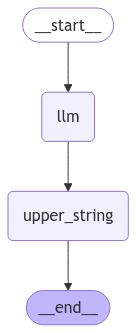

In [14]:
workflow.compile()

In [15]:
app=workflow.compile()

In [16]:
app.invoke("Hi")

'I\'M JUST A LANGUAGE MODEL, I DON\'T HAVE EMOTIONS OR FEELINGS LIKE HUMANS DO, SO I DON\'T HAVE GOOD OR BAD DAYS. I\'M ALWAYS "ON" AND READY TO HELP WITH ANY QUESTIONS OR TASKS YOU MAY HAVE! HOW CAN I ASSIST YOU TODAY?'

In [17]:
app.invoke("tell me about apple")

'I\'M JUST A LANGUAGE MODEL, I DON\'T HAVE EMOTIONS OR FEELINGS LIKE HUMANS DO, SO I DON\'T HAVE GOOD OR BAD DAYS. I\'M ALWAYS "ON" AND READY TO HELP WITH ANY QUESTIONS OR TASKS YOU MAY HAVE! HOW CAN I ASSIST YOU TODAY?'

In [18]:
!pip install langgraph langchain langchain_community langchainhub langchain_groq scikit-learn pandas --quiet



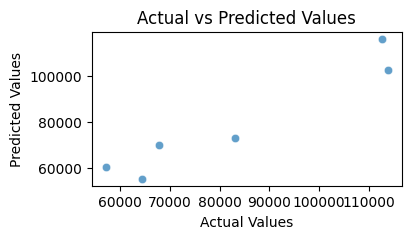

Model Evaluation:
Mean Squared Error = 55494098.1314222
Mean Absolute Error = 6515.681891615336
R2 Score = 0.8913575982179494


In [19]:
# !pip install langgraph langchain langchain_community langchainhub langchain_groq scikit-learn pandas matplotlib seaborn --quiet

from langgraph.graph import Graph
from langchain_groq import ChatGroq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


groq_api_key = "groq-api-key"
llm_name = "llama3-70b-8192"
llm = ChatGroq(temperature=0, groq_api_key=groq_api_key, model_name=llm_name)

# Preprocessing function
def preprocessor(input):
    df = input["input"]
    df = df.dropna()
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test}

# Training function
def trainer(input):
    X_train, y_train = input["X_train"], input["y_train"]
    model = LinearRegression()
    model.fit(X_train, y_train)
    return {"model": model, "X_test": input["X_test"], "y_test": input["y_test"]}

# Evaluation function
def evaluator(input):
    model, X_test, y_test = input["model"], input["X_test"], input["y_test"]
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Visualization
    plt.figure(figsize=(4, 2))
    sns.scatterplot(x=y_test, y=predictions, alpha=0.7)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.show()

    return f"Model Evaluation:\nMean Squared Error = {mse}\nMean Absolute Error = {mae}\nR2 Score = {r2}"


workflow = Graph()
workflow.add_node("preprocessor", preprocessor)
workflow.add_node("trainer", trainer)
workflow.add_node("evaluator", evaluator)

workflow.add_edge("preprocessor", "trainer")
workflow.add_edge("trainer", "evaluator")

workflow.set_entry_point("preprocessor")
workflow.set_finish_point("evaluator")


workflow.compile()
app = workflow.compile()

df = pd.read_csv("Salary_dataset.csv")
print(app.invoke({"input": df}))

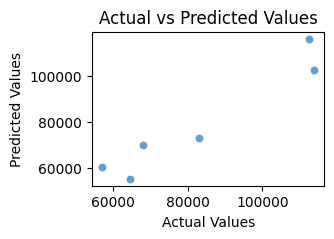

Retraining the model with adjusted parameters...


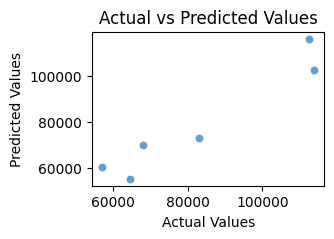

Retraining the model with adjusted parameters...


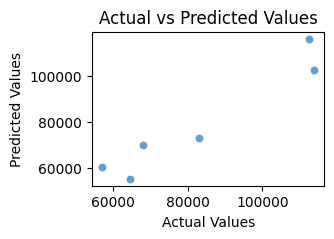

Retraining the model with adjusted parameters...


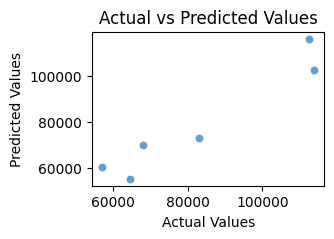

Retraining the model with adjusted parameters...


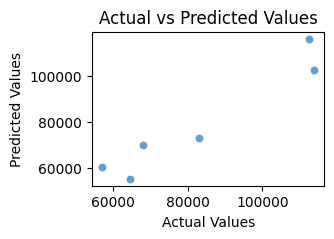

Retraining the model with adjusted parameters...


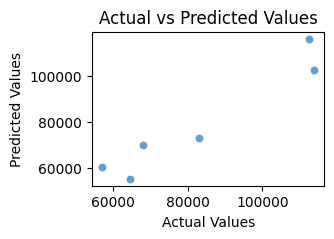

Retraining the model with adjusted parameters...


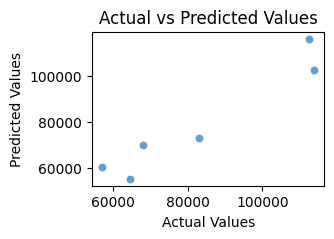

Retraining the model with adjusted parameters...


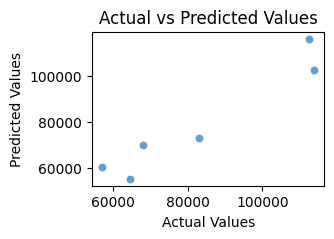

Retraining the model with adjusted parameters...


GraphRecursionError: Recursion limit of 25 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

In [20]:
# !pip install langgraph langchain langchain_community langchainhub langchain_groq scikit-learn pandas matplotlib seaborn --quiet

from langgraph.graph import StateGraph
from langchain_groq import ChatGroq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from typing import Annotated, Dict

groq_api_key = "groq-api-key"
llm_name = "llama3-70b-8192"
llm = ChatGroq(temperature=0, groq_api_key=groq_api_key, model_name=llm_name)

StateType = Annotated[Dict[str, any], "State"]

# Preprocessing
def preprocessor(input: StateType) -> StateType:
    df = input["input"]
    df = df.dropna()
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    state = input.copy()
    state.update({"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test})
    return state

# Training
def trainer(input: StateType) -> StateType:
    state = input.copy()  # Copy existing state
    X_train, y_train = state["X_train"], state["y_train"]
    model = LinearRegression()
    model.fit(X_train, y_train)
    state.update({
        "model": model,
        "train_error": mean_squared_error(y_train, model.predict(X_train))
    })
    return state

# Evaluation
def evaluator(input: StateType) -> StateType:
    state = input.copy()
    model = state["model"]
    X_test, y_test = state["X_test"], state["y_test"]
    train_error = state["train_error"]

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Visualization
    plt.figure(figsize=(3, 2))
    sns.scatterplot(x=y_test, y=predictions, alpha=0.7)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.show()

    # Autonomous retraining decision: if test error is significantly higher than train error, flag for retraining
    retrain = mse > train_error * 1.2

    state.update({
        "evaluation": f"Model Evaluation:\nMean Squared Error = {mse}\nMean Absolute Error = {mae}\nR2 Score = {r2}",
        "retrain": retrain,
        "mse": mse,
        "mae": mae,
        "r2": r2
    })
    return state

# Autonomous retraining function
def retrainer(input: StateType) -> StateType:
    state = input.copy()
    if state.get("retrain", False):
        print("Retraining the model with adjusted parameters...")
        state.update({"retrain": False})
    return state

workflow = StateGraph(StateType)

workflow.add_node("preprocessor", preprocessor)
workflow.add_node("trainer", trainer)
workflow.add_node("evaluator", evaluator)
workflow.add_node("retrainer", retrainer)

workflow.add_edge("preprocessor", "trainer")
workflow.add_edge("trainer", "evaluator")
workflow.add_edge("evaluator", "retrainer")
workflow.add_edge("retrainer", "trainer")  # Feedback loop

workflow.set_entry_point("preprocessor")
workflow.set_finish_point("evaluator")


app = workflow.compile()


df = pd.read_csv("Salary_dataset.csv")
print(app.invoke({"input": df}))


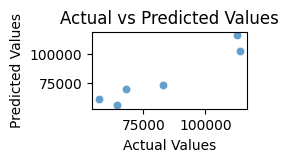

LLM response: yes
LLM decision: Retraining the model with adjusted parameters...


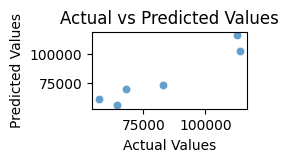

LLM response: yes
LLM decision: Retraining the model with adjusted parameters...


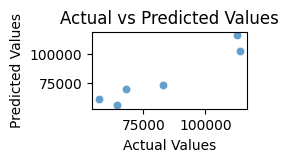

LLM response: yes
LLM decision: Retraining the model with adjusted parameters...


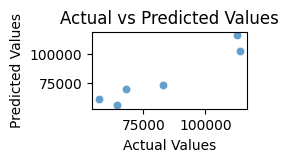

LLM response: yes
LLM decision: Retraining the model with adjusted parameters...


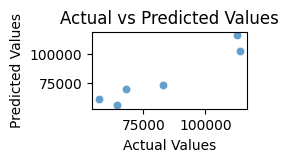

LLM response: yes
LLM decision: Retraining the model with adjusted parameters...


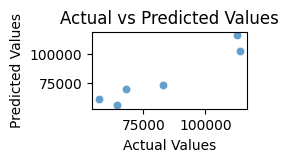

Maximum iterations reached (5). Stopping retraining.


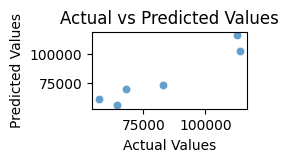

Maximum iterations reached (5). Stopping retraining.


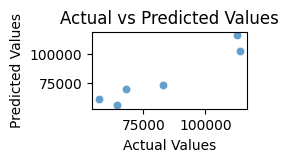

Maximum iterations reached (5). Stopping retraining.


GraphRecursionError: Recursion limit of 25 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

In [21]:
# !pip install langgraph langchain langchain_community langchainhub langchain_groq scikit-learn pandas matplotlib seaborn --quiet

from langgraph.graph import StateGraph
from langchain_groq import ChatGroq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from typing import Annotated, Dict


groq_api_key = "groq-api-key"
llm_name = "llama3-70b-8192"
llm = ChatGroq(temperature=0, groq_api_key=groq_api_key, model_name=llm_name)


StateType = Annotated[Dict[str, any], "State"]

# Preprocessing
def preprocessor(input: StateType) -> StateType:
    df = input["input"]
    df = df.dropna()
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    state = input.copy()
    state.update({
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test,
        "iteration_count": 0,
        "max_iterations": 5
    })
    return state

# Training
def trainer(input: StateType) -> StateType:
    state = input.copy()
    X_train, y_train = state["X_train"], state["y_train"]
    model = LinearRegression()
    model.fit(X_train, y_train)
    state.update({
        "model": model,
        "train_error": mean_squared_error(y_train, model.predict(X_train))
    })
    return state

# Evaluation
def evaluator(input: StateType) -> StateType:
    state = input.copy()
    model = state["model"]
    X_test, y_test = state["X_test"], state["y_test"]
    train_error = state["train_error"]

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Visualization
    plt.figure(figsize=(2, 1))
    sns.scatterplot(x=y_test, y=predictions, alpha=0.7)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.show()

    # Autonomous retraining decision: flag retraining if test error is significantly higher than training error
    retrain = mse > train_error * 1.2
    state.update({
        "evaluation": f"Model Evaluation:\nMean Squared Error = {mse}\nMean Absolute Error = {mae}\nR2 Score = {r2}",
        "retrain": retrain,
        "mse": mse,
        "mae": mae,
        "r2": r2
    })
    return state

# Autonomous retraining function using LLM (Groq) with an iteration counter to break the loop if needed
def retrainer(input: StateType) -> StateType:
    state = input.copy()
    iteration = state.get("iteration_count", 0)
    max_iter = state.get("max_iterations", 5)


    if iteration >= max_iter:
        print(f"Maximum iterations reached ({max_iter}). Stopping retraining.")
        state["retrain"] = False
        return state

    if state.get("retrain", False):
        prompt = (
            f"Iteration {iteration}: The model has a training error of {state['train_error']} and a test MSE of {state['mse']}. "
            "Should I retrain the model with adjusted parameters? Respond with 'yes' or 'no'."
        )
        # Use LLM to decide whether to retrain
        response = llm.invoke(prompt).content
        print("LLM response:", response)

        if "yes" in response.lower():
            print("LLM decision: Retraining the model with adjusted parameters...")
            state["iteration_count"] = iteration + 1
            state["retrain"] = False  # Reset flag to allow the loop to continue to trainer node
        else:
            print("LLM decision: No retraining required.")
            state["retrain"] = False
    return state

workflow = StateGraph(StateType)

workflow.add_node("preprocessor", preprocessor)
workflow.add_node("trainer", trainer)
workflow.add_node("evaluator", evaluator)
workflow.add_node("retrainer", retrainer)

workflow.add_edge("preprocessor", "trainer")
workflow.add_edge("trainer", "evaluator")
workflow.add_edge("evaluator", "retrainer")
workflow.add_edge("retrainer", "trainer")  # Feedback loop

workflow.set_entry_point("preprocessor")
workflow.set_finish_point("evaluator")


app = workflow.compile()

df = pd.read_csv("Salary_dataset.csv")
print(app.invoke({"input": df}))


LLM Analysis: Based on the provided dataset structure, I've identified a few potential issues:

1. **Unnamed column**: The first column is labeled as "Unnamed: 0", which suggests that the column was not explicitly named during data import or creation. This can lead to confusion and make it harder to work with the data. It's recommended to assign a meaningful name to this column.

2. **Index column**: The values in the "Unnamed: 0" column appear to be a continuous sequence of integers, which is typical of an index column in a pandas DataFrame. However, it's not clear why this column is present in the dataset. If it's not necessary, it can be safely removed to simplify the dataset.

3. **Data types**: The "YearsExperience" column appears to contain decimal values, which might be suitable for this type of data. However, it's essential to verify that the data type is indeed numeric (e.g., float) and not string.

4. **Salary data**: The "Salary" column contains numeric values, but it's cruc

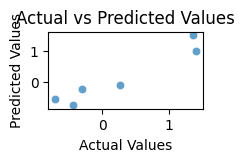

KeyError: 'y_test'

In [22]:
# !pip install langgraph langchain langchain_community langchainhub langchain_groq scikit-learn pandas matplotlib seaborn xgboost --quiet

from langgraph.graph import StateGraph
from langchain_groq import ChatGroq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from typing import Annotated, Dict


groq_api_key = "groq-api-key"
llm = ChatGroq(temperature=0, groq_api_key=groq_api_key, model_name="llama3-70b-8192")


StateType = Annotated[Dict, "State"]

#LLM Preprocessing Agent
def llm_preprocessor(input: StateType) -> StateType:
    df = input["input"].copy()


    df.columns = df.columns.str.replace(r"[<>[\]{}()]", "", regex=True)


    df = df.dropna(axis=1, how="all")

    #LLM-powered description
    prompt = f"Analyze this dataset structure:\n{df.head().to_string()}\nWhat issues do you see?"
    llm_response = llm.invoke(prompt)
    print(f"LLM Analysis: {llm_response.content}")

    return {"df": df}

# Data Cleaning & Encoding
def data_cleaner(input: StateType) -> StateType:
    df = input["df"].copy()


    categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
    numerical_cols = df.select_dtypes(include=["number"]).columns.tolist()


    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    if categorical_cols:
        cat_encoded = encoder.fit_transform(df[categorical_cols])
        cat_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(categorical_cols))
        df = df.drop(columns=categorical_cols).reset_index(drop=True)
        df = pd.concat([df, cat_df], axis=1)


    imputer = SimpleImputer(strategy="mean")
    df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test, "encoder": encoder}

#Model Selection & Training
def model_trainer(input: StateType) -> StateType:
    X_train, y_train = input["X_train"], input["y_train"]

    # Select model dynamically
    if X_train.shape[1] > 10:
        model = XGBRegressor()
    elif X_train.shape[0] > 1000:
        model = RandomForestRegressor()
    else:
        model = LinearRegression()

    model.fit(X_train, y_train)
    return {"model": model, "X_test": input["X_test"], "y_test": input["y_test"]}

#Evaluation
def model_evaluator(input: StateType) -> StateType:
    model, X_test, y_test = input["model"], input["X_test"], input["y_test"]
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)


    plt.figure(figsize=(2, 1))
    sns.scatterplot(x=y_test, y=predictions, alpha=0.7)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.show()

    return {"evaluation": f"MSE: {mse}\nMAE: {mae}\nR2: {r2}", "mse": mse}

# Retraining
def adaptive_retrainer(input: StateType) -> StateType:
    if input["mse"] > 1.2 * np.mean(input["y_test"]):
        print("Retraining model with adjusted parameters...")
        return {"retrain": True}
    return {"retrain": False}


workflow = StateGraph(StateType)

workflow.add_node("llm_preprocessor", llm_preprocessor)
workflow.add_node("data_cleaner", data_cleaner)
workflow.add_node("model_trainer", model_trainer)
workflow.add_node("model_evaluator", model_evaluator)
workflow.add_node("adaptive_retrainer", adaptive_retrainer)

workflow.add_edge("llm_preprocessor", "data_cleaner")
workflow.add_edge("data_cleaner", "model_trainer")
workflow.add_edge("model_trainer", "model_evaluator")
workflow.add_edge("model_evaluator", "adaptive_retrainer")
workflow.add_edge("adaptive_retrainer", "model_trainer")  #Feedback loop

workflow.set_entry_point("llm_preprocessor")
workflow.set_finish_point("model_evaluator")

# Compile and Run
app = workflow.compile()

# 🔹 Example Usage
df = pd.read_csv("Salary_dataset.csv")
print(app.invoke({"input": df}))

